<body>
    <h1>Report: Traffic Prediction</h1>
    <h2>Contents:</h2>
    <ol>
        <li>Introduction</li>
        <li>Data Source</li>
        <li>Installation of Dependencies</li>
        <li>Loading Data</li>
        <li>Answering Broad Questions</li>
        <ol type="1">
            <li>Question 1 and Inference 1</li>
            <li>Question 2 and Inference 2</li>
            <li>Question 3 and Inference 3</li>
            <li>Question 4 and Inference 4</li>
        </ol>
        <li>Conclusion</li>
        <li>Questions for Further Research</li>
    </ol>
    
<h2>Introduction:</h2>
<br>
<li>Traffic-related problems are a common concern in urban areas. Understanding traffic and weather data can provide valuable insights into how weather conditions affect traffic. This leads to questions about predicting traffic conditions based on weather conditions.</li>
    <ol type="1">
        <li>What are the average traffic counts for cars, bikes, buses, trucks, and the total count across different days of the week? Are there any notable patterns or variations in traffic volume throughout the week based on this visualization?</li>
<br>
        <li>How do different weather summaries impact bike, car, bus, and truck counts across the dataset?</li>
<br>
        <li>What is the relationship between visibility and total traffic count? Is the total traffic dependent on visibility?</li>
<br>
        <li>What is the impact of traffic situations on traffic counts? Which vehicle count is more?</li>
    </ol>
<br>
<br>
    
    
<h2>Data Source:</h2>
<p>This project uses open data from the following data sources:</p>
<ul>
    <li>Data Source 1:
        <ul>
            <li>Data URL 1: <a href="https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset?select=Traffic.csv">Traffic Prediction Dataset</a></li>
            <li>Description: Vehicle count data categorized by vehicle type, along with information about the traffic situation at specific times and days of the week.</li>
            </ul>
        </li>
        <li>Data Source 2:
            <ul>
                <li>Data URL 2: <a href="https://www.kaggle.com/datasets/muthuj7/weather-dataset?select=weatherHistory.csv">Weather Dataset</a></li>
                <li>Description: Weather-related information such as temperature, humidity, wind speed, and atmospheric pressure, along with timestamp and daily summaries.</li>
            </ul>
        </li>
    </ul>
</body>
</html>


# Installation of dependencies

Initially, install all required dependencies. 

In [159]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Loading Data

Using the pandas dataframe we fetch the data from the sqlite file.

In [134]:
import sqlite3
import pandas as pd


database_path = r"D:\made\traffic.sqlite"  

# Check if the file exists
if not os.path.exists(database_path):
    print("File not found.")
else:
    # Establish a connection to the SQLite database
    conn = sqlite3.connect(database_path)

    # Writing SQL query
    query = "SELECT * FROM traffic"  # Replace 'your_table_name' with the actual table name

    # Read data into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the connection
    conn.close()

    # Display the DataFrame
    print(df.head())  # Display the first few rows of the DataFrame


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


In [135]:
import sqlite3
import pandas as pd


database_path = r"D:\made\weather.sqlite"  

# Check if the file exists
if not os.path.exists(database_path):
    print("File not found.")
else:
    # Establish a connection to the SQLite database
    conn = sqlite3.connect(database_path)

    # Writing SQL query 
    query = "SELECT * FROM weather"  

    # Read data into a Pandas DataFrame
    df1 = pd.read_sql_query(query, conn)

    # Close the connection
    conn.close()

    # Display the DataFrame
    print(df.head())  # Display the first few rows of the DataFrame


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


<br>
<br>
<p>Converting the Formatted Date column from object to datetime and we will make the one seperate column of name time by fetching the time data from the Formatted Date column which we can use to merge two data.</p>

In [136]:

# Convert 'Formatted Date' column to datetime format explicitly
df1['Formatted Date'] = pd.to_datetime(df1['Formatted Date'], utc=True)

# Extract time from the 'Formatted Date' column and create a new 'Time' column
df1['Time'] = df1['Formatted Date'].dt.time

# Add the 'Time' column to the original DataFrame
df1['Time'] = df1['Time'].astype(str)  # Convert time to string for merging

# Display the updated DataFrame with the new 'Time' column
print(df1.head())


             Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0   

<h3>Displaying the information of the data of the df dataset</h3>

In [155]:
df.info

<bound method DataFrame.info of                     Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0    2024-01-09 00:00:00    10         Tuesday        31          0         4   
1    2024-01-09 00:15:00    10         Tuesday        49          0         3   
2    2024-01-09 00:30:00    10         Tuesday        46          0         3   
3    2024-01-09 00:45:00    10         Tuesday        51          0         2   
4    2024-01-09 01:00:00    10         Tuesday        57          6        15   
...                  ...   ...             ...       ...        ...       ...   
2971 2024-01-09 22:45:00     9        Thursday        16          3         1   
2972 2024-01-09 23:00:00     9        Thursday        11          0         1   
2973 2024-01-09 23:15:00     9        Thursday        15          4         1   
2974 2024-01-09 23:30:00     9        Thursday        16          5         0   
2975 2024-01-09 23:45:00     9        Thursday        14          3         1

<h3>Displaying the information of the data of the df1 dataset</h3>

In [138]:
df1.info


<bound method DataFrame.info of                  Formatted Date        Summary Precip Type  Temperature (C)  \
0     2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1     2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2     2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3     2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4     2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   
...                         ...            ...         ...              ...   
96448 2016-09-09 17:00:00+00:00  Partly Cloudy        rain        26.016667   
96449 2016-09-09 18:00:00+00:00  Partly Cloudy        rain        24.583333   
96450 2016-09-09 19:00:00+00:00  Partly Cloudy        rain        22.038889   
96451 2016-09-09 20:00:00+00:00  Partly Cloudy        rain        21.522222   
96452 2016-09-09 21:00:00+00:00  Partly Cloudy        rain        20.438889   

       Apparent Tem

<h3>It describe the data like total,mean,minimun,maximum form.</h3>

In [139]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [140]:
df1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


<h3> Checking the type of the df data columns.</h3>

In [141]:
print(df.dtypes)

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object


<h3>Converting the Time column datatype from object to datetime.</h3>

In [144]:
import pandas as pd

# Display the current data type of the column
print("Before Conversion:")
print(df['Time'].dtype)

# Convert the Time to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Display the updated data type of the column
print("\nAfter Conversion:")
print(df['Time'].dtype)


Before Conversion:
datetime64[ns]

After Conversion:
datetime64[ns]


<h3> Checking the df1 column datatype.</h3>

In [145]:
print(df1.dtypes)

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
Time                                     object
dtype: object


<h3> Converting the Time data type from object to datetime and Daily Summary from object to category data type.</h3>

In [146]:
import pandas as pd

# Assuming your DataFrame is named 'df1'

# Convert 'Time' column to time format
df1['Time'] = pd.to_datetime(df1['Time'])

# Change 'Daily Summary' column to categorical
df1['Daily Summary'] = df1['Daily Summary'].astype('category')

# Change 'Summary' column to categorical
df1['Summary'] = df1['Summary'].astype('category')

# Check the data types after conversion
print(df1.dtypes)


Formatted Date              datetime64[ns, UTC]
Summary                                category
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                          category
Time                             datetime64[ns]
dtype: object


<h3> Checking the total empty or nan values in the column.</h3> 

In [147]:
df1.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Time                          0
dtype: int64

In [148]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

<h3>Drop the nan values from the column.</h3>

In [149]:
# Drop columns with NaN values
df1.dropna(axis=1, inplace=True)

# Display the first 5 rows after dropping columns with NaN values
print(df1.head())


             Formatted Date        Summary  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   

In [150]:
df1.isna().sum()

Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Time                        0
dtype: int64

### 1. What are the average traffic counts for cars, bikes, buses, trucks, and the total count across different days of the week? Are there any notable patterns or variations in traffic volume throughout the week based on this visualization?

To answer the first question we will plot the bar graph for the Average Traffic count by Days of the week.
<br>
<ul>
    <li>x-axis as the Days of Week</li>
    <li>y-axis as the Average Traffic Count</li>
 </ul>

<Figure size 720x432 with 0 Axes>

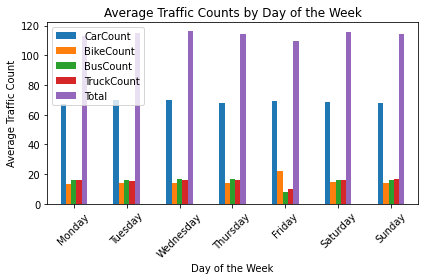

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' contains your traffic data DataFrame

# Convert 'Day of the week' to a categorical variable to ensure correct sorting
df['Day of the week'] = pd.Categorical(df['Day of the week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Group by 'Day of the week' and calculate average traffic counts for each day
traffic_by_day = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].mean()

# Plotting average traffic counts for each day
plt.figure(figsize=(10, 6))
traffic_by_day.plot(kind='bar', rot=45)
plt.title('Average Traffic Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Count')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Inference for question 1:

We can have following inference from the above graph:

<ul>

<li>As we can see in the bar chart that the number of people using the car is very high as compared to the bike,bus and truck, Whereas the number of bike,bus and truck are aproximately equal but on friday the number of bike count increases as compared to the bus and truck.</li>
<li>The average count of the cars is around 60 where as the average of the other 3 vehicle is around 20.</li>
</ul>

### 2. How different weather summaries impact bike,car,bus and truck counts across the dataset.
<br>
To answer the second question we are plotting the barplot with:
<br>
<ul>
    <li>x-axis as the Weather Summary</li>
    <li>y-axis as the Bike Count</li>
</ul>

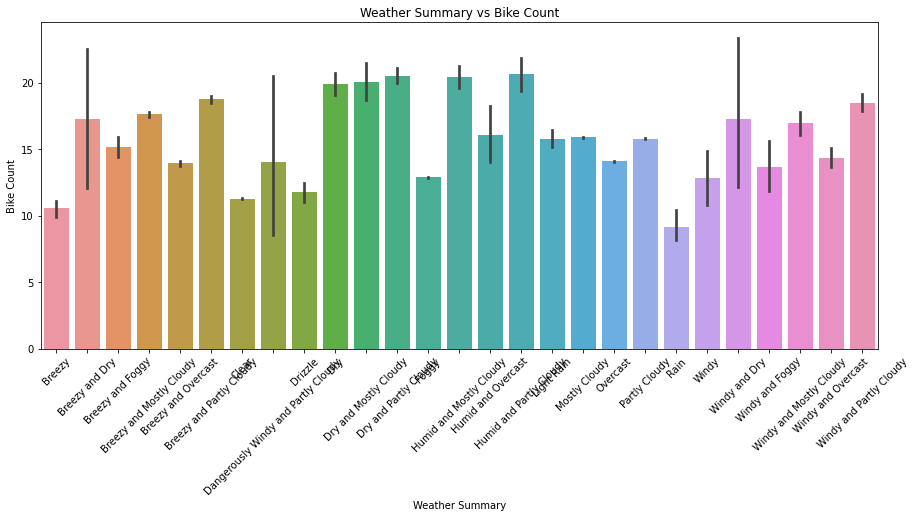

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your datasets into df1 and df

# Merge datasets on the 'Time' column
merged_df = pd.merge(df1, df, on='Time')

# Drop rows with missing values in specific columns of interest
merged_df.dropna(subset=['Summary', 'BikeCount'], inplace=True)

# Investigate impact of weather changes on bike counts using a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Summary', y='BikeCount', data=merged_df)
plt.title('Weather Summary vs Bike Count')
plt.xlabel('Weather Summary')
plt.ylabel('Bike Count')
plt.xticks(rotation=45)
plt.show()


## Inference for question 2.1:

We can have the following inference from the above graph:

<ul>
    <li> Here the bar chart represent how the number of bikes increase or decrease according to the weather condition.</li>
    <li> According to the bar chat the number of bike increase when the whether summary is "Humid and Mostly Cloudy", whereas number of bike decrease when the weather summary is "Rainy".</li>
</ul>

<h3> Q2</h3>

<br>
To answer the second question we are plotting the barplot with:
<br>
<ul>
    <li>x-axis as the Weather Summary</li>
    <li>y-axis as the car Count</li>
</ul>

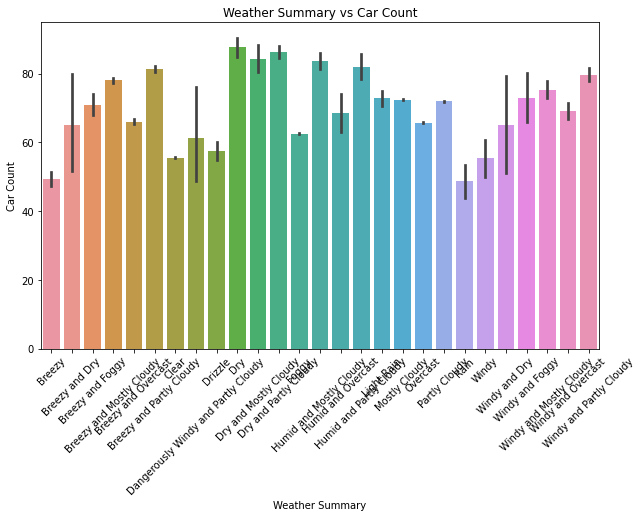

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your datasets into df1 and df

# Merge datasets on the 'Time' column
merged_df = pd.merge(df1, df, on='Time')

# Drop rows with missing values in specific columns of interest
merged_df.dropna(subset=['Summary', 'CarCount'], inplace=True)

# Investigate impact of weather changes on bike counts using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Summary', y='CarCount', data=merged_df)
plt.title('Weather Summary vs Car Count')
plt.xlabel('Weather Summary')
plt.ylabel('Car Count')
plt.xticks(rotation=45)
plt.show()


## Inference for question 2.2:

We can have the following inference from the above graph:

<ul>
    <li> Here the bar chart represent how the number of cars increase or decrease according to the weather condition.</li>
    <li> According to the bar chat the number of cars increase when the whether summary is "Dry", whereas number of Cars decrease when the weather summary is "Rainy and Breezy".</li>
</ul>

<h3> Q2</h3>

<br>
To answer the second question we are plotting the barplot with:
<br>
<ul>
    <li>x-axis as the Weather Summary</li>
    <li>y-axis as the Bus Count</li>
</ul>

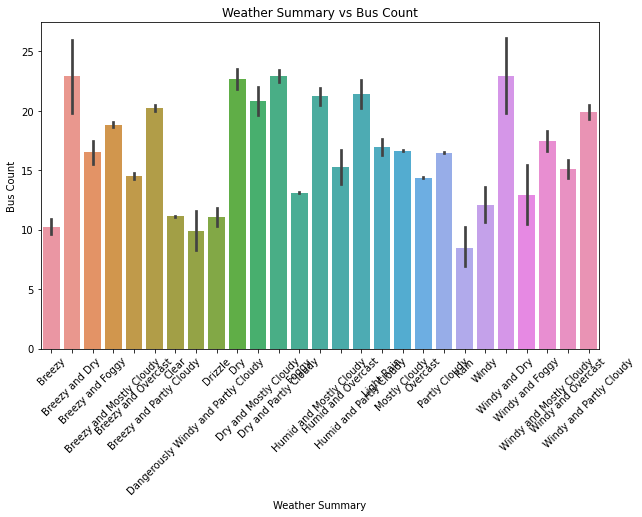

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your datasets into df1 and df

# Merge datasets on the 'Time' column
merged_df = pd.merge(df1, df, on='Time')

# Drop rows with missing values in specific columns of interest
merged_df.dropna(subset=['Summary', 'BusCount'], inplace=True)

# Investigate impact of weather changes on bike counts using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Summary', y='BusCount', data=merged_df)
plt.title('Weather Summary vs Bus Count')
plt.xlabel('Weather Summary')
plt.ylabel('Bus Count')
plt.xticks(rotation=45)
plt.show()


## Inference for question 2.3:

We can have the following inference from the above graph:

<ul>
    <li> Here the bar chart represent how the number of Bus increase or decrease according to the weather condition.</li>
    <li> According to the bar chat the number of Bus increase when the whether summary is "Breezy and Dry" and "Windy and Dry", whereas number of Bus decrease when the weather summary is "Rainy".</li>
</ul>

<h3> Q2</h3>

<br>
To answer the second question we are plotting the barplot with:
<br>
<ul>
    <li>x-axis as the Weather Summary</li>
    <li>y-axis as the Truck Count</li>
</ul>

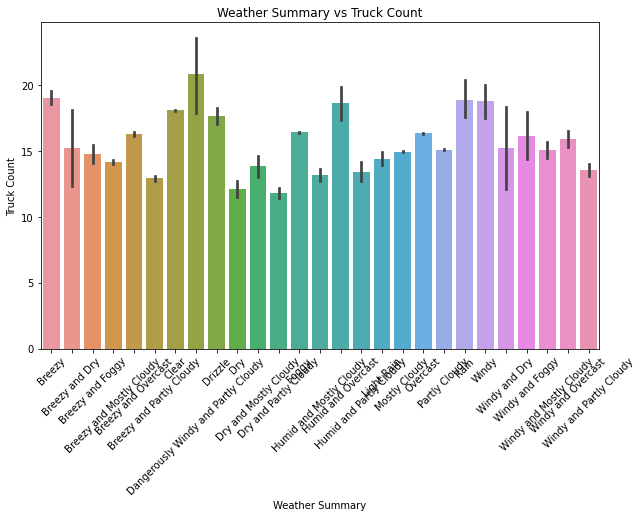

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your datasets into df1 and df

# Merge datasets on the 'Time' column
merged_df = pd.merge(df1, df, on='Time')

# Drop rows with missing values in specific columns of interest
merged_df.dropna(subset=['Summary', 'TruckCount'], inplace=True)

# Investigate impact of weather changes on bike counts using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Summary', y='TruckCount', data=merged_df)
plt.title('Weather Summary vs Truck Count')
plt.xlabel('Weather Summary')
plt.ylabel('Truck Count')
plt.xticks(rotation=45)
plt.show()


## Inference for question 2.4:

We can have the following inference from the above graph:

<ul>
    <li> Here the bar chart represent how the number of Truck increase or decrease according to the weather condition.</li>
    <li> According to the bar chat the number of Truck increase when the whether summary is "Drizzle", whereas number of Truck decrease when the weather summary is "Foggy".</li>
</ul>

### 3. What is the relationship between the Visibility and Total traffic Count? Is the total traffic is dependent on the visibility?
<br>
For the question third we are plotting the correlation between the visibility(km) and Total Traffic Count using the scatter plot with:
<br>
<ul>
    <li>x-axis as the Visibility</li>
    <li>y-axis as the Total Traffic Count</li>
</ul>

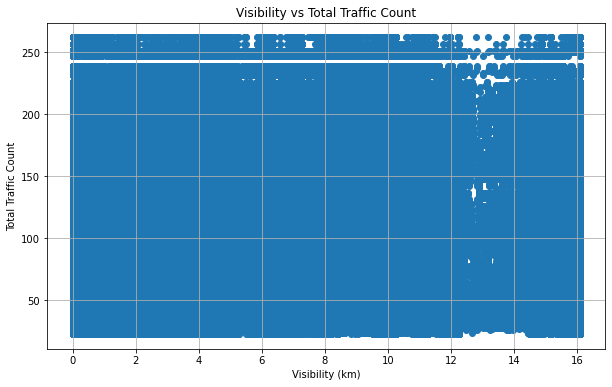

Correlation between Visibility and Total Traffic Count: -0.09922246173255697


In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 contains traffic data and df2 contains weather data
# Merge the datasets on the 'Time' column
merged_df = pd.merge(df1, df, on='Time')

# Visualize the relationship between visibility and traffic counts
plt.figure(figsize=(10, 6))

# Scatter plot of Visibility vs Total Traffic Count
plt.scatter(merged_df['Visibility (km)'], merged_df['Total'])
plt.title('Visibility vs Total Traffic Count')
plt.xlabel('Visibility (km)')
plt.ylabel('Total Traffic Count')
plt.grid(True)
plt.show()

# Calculate correlation between visibility and total traffic count
correlation = merged_df['Visibility (km)'].corr(merged_df['Total'])
print(f"Correlation between Visibility and Total Traffic Count: {correlation}")


## Inference for question 3:

<ul>
    <li> The Graph represent a scatter plot visualizing the relationship between visibility(km) and Total Traffic Count. This plot help us understanding the inside pattern or relationship between visibility and the total traffic.</li>
    <li> The graph pattern suggest that instance of both high visibility and high traffic count are less frequent or less often in the dataset</li>
    

### 4. What is the Impact of Traffic Situations on Traffic Counts? Which vehicle count is more?
<br>
For the question fourth we will plot the bar chart for the Impact of Traffic Situations on Traffic Counts with:
<br>
<ul>
    <li>x-axis as the Traffic Situation</li>
    <li>y-axis as the Average Count</li>

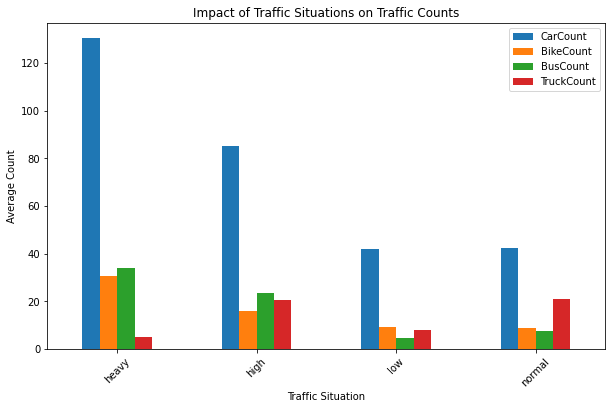

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your datasets into df1 and df2

# Merge both datasets on the 'Time' column
merged_df = pd.merge(df1, df, on='Time')

# Group by 'Traffic Situation' and calculate mean counts for each type of traffic
traffic_situation_traffic_counts = merged_df.groupby('Traffic Situation').mean()[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]

# Plotting the impact of Traffic Situations on different traffic counts
traffic_situation_traffic_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Traffic Situations on Traffic Counts')
plt.xlabel('Traffic Situation')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Inference for question 4:

<ul>
    <li> The above graph pattern represent the average count of the vehicle based on the traffic situation</li>
    <li> The graph shows that the number of cars are more when the traffic condition is "heavy" and "high"</li>
    <li> The truck count is very less as compared to the other vehicle count</li>
    <li> Whereas the vehicle is normal for the low and normal condition but the number cars are still more as compared to the other vehicles.</li>

# Conclusion:

<ul>
    <li>Traffic Distribution: Cars consistently dominate vehicle counts, especially during high traffic situations. Conversely, trucks have a notably lower presence.</li>
    <li>Weather Influence on Vehicle Counts: Different weather conditions impact vehicle counts differently. For instance, bikes see higher usage during certain weather patterns like "Humid and Mostly Cloudy," while other vehicles like cars, buses, and trucks fluctuate based on weather conditions, with increases or decreases observed in response to specific weather summaries.</li>
    <li>Visibility and Traffic Relationship: The scatter plot demonstrates that high traffic instances coincide less frequently with high visibility.</li>
</ul>

# Questions for Further Research:

The following questions remain open for further research:

<ul>
    <li> 1. How do specific weather conditions influence the usage patterns of different vehicles (cars, bikes, buses, trucks)? Are there particular weather conditions that significantly affect each vehicle type's usage?</li>
    <li> 2. How do various weather situations affect traffic congestion or flow? Do certain weather conditions lead to more congested roads or specific traffic scenarios?</li>
    <li> 3. How do different traffic situations change over time? Are there specific periods or days of the week when certain traffic situations are more prevalent?</li>
</ul>